In [54]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns

*Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of 
cols & types of variables? (1 MARK)
b. Convert the data into time series (2 MARK)
c. Check for defects in the data such as missing values, null, etc. (1 MARK)
d. Visualize the time series using relevant plots. (1 MARK)*


In [55]:
df = pd.read_csv('Stock.csv')
df.head(5)

,TimeStamp,Close
0,01-05-2017,64.57
1,02-05-2017,63.78
2,03-05-2017,62.20
3,04-05-2017,59.09
4,05-05-2017,61.67


In [56]:
df.shape  #442 records and 2 features

(442, 2)

In [57]:
df = pd.read_csv('Stock.csv', parse_dates=True)
df.tail(5)  #So time period  is monthly and freq is daily

,TimeStamp,Close
437,02-01-2019,59.41
438,03-01-2019,59.28
439,04-01-2019,59.49
440,07-01-2019,61.75
441,08-01-2019,61.40


In [58]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], format='%d-%m-%Y')
df = df.set_index(df['TimeStamp'])
df.drop(['TimeStamp'], axis=1, inplace=True)
df.head(5)

,Close
TimeStamp,
2017-05-01,64.57
2017-05-02,63.78
2017-05-03,62.20
2017-05-04,59.09
2017-05-05,61.67


In [59]:
df.isna().sum()
df.dtypes

Close    float64
dtype: object

<Axes: >

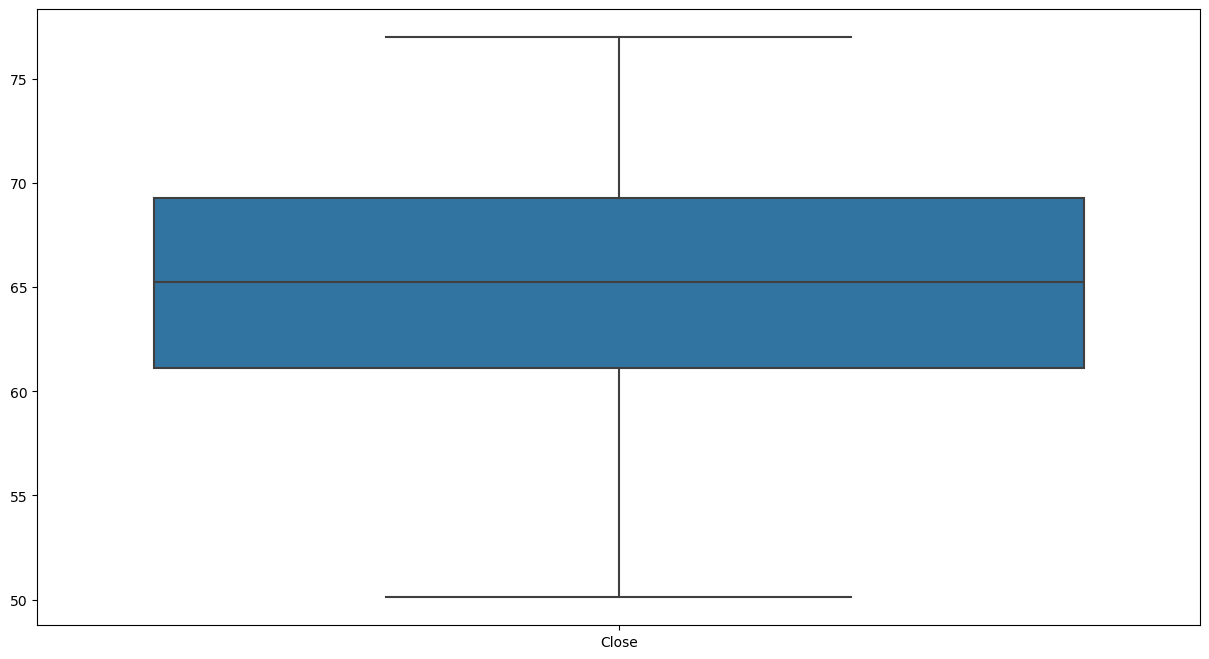

In [60]:
sns.boxplot(df)

<Axes: xlabel='TimeStamp'>

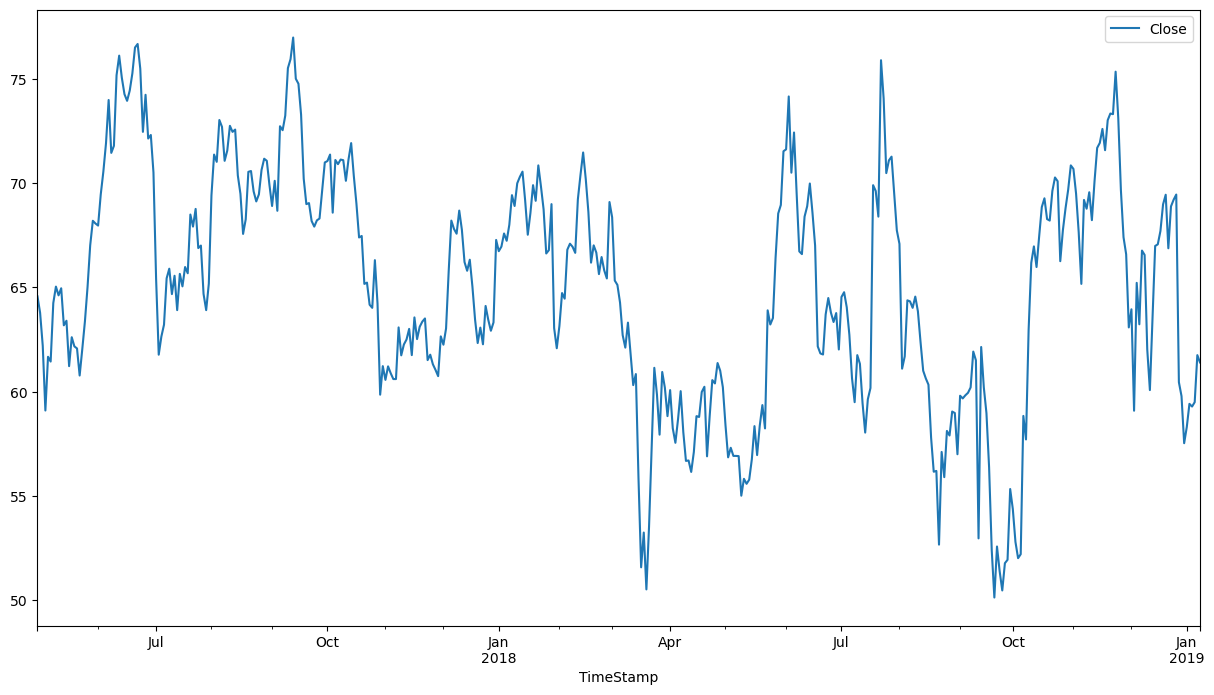

In [61]:
plt.rcParams['figure.figsize'] = 15,8
df.plot()

2. Data understanding (15 marks)
a. Decompose the time series and check for time series components. (4 marks)
b. Perform dicky fuller test to check the stationarity? What other actions will you take if series 
is non-stationary? (3+1 marks)
c. Plot Auto Correlation and Partial Auto Correlation function? What is your inference from 
these plots? (2+2 marks)
d. Split dataset into train and test sets. Use last one-month data for testing. (3 marks)

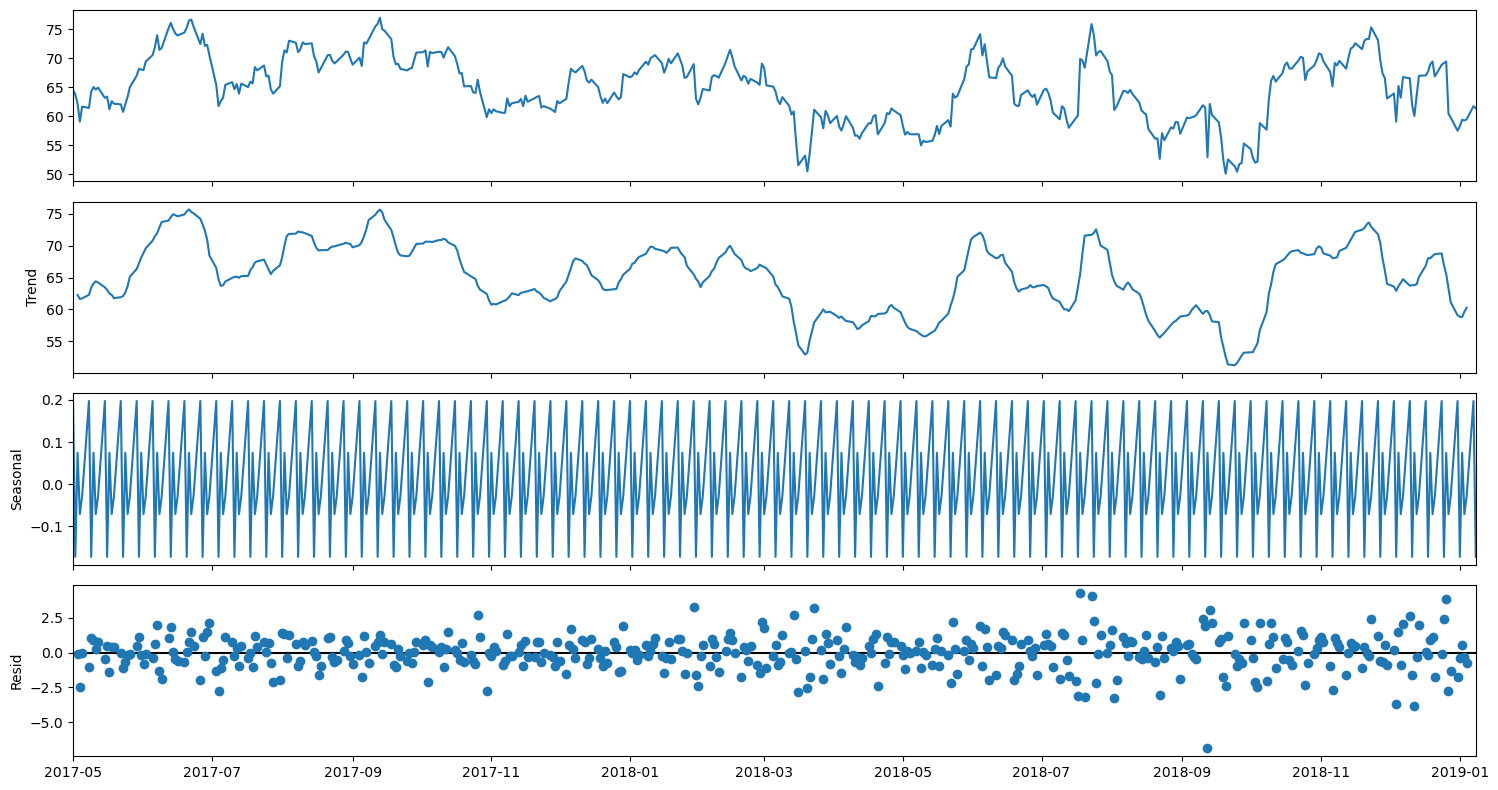

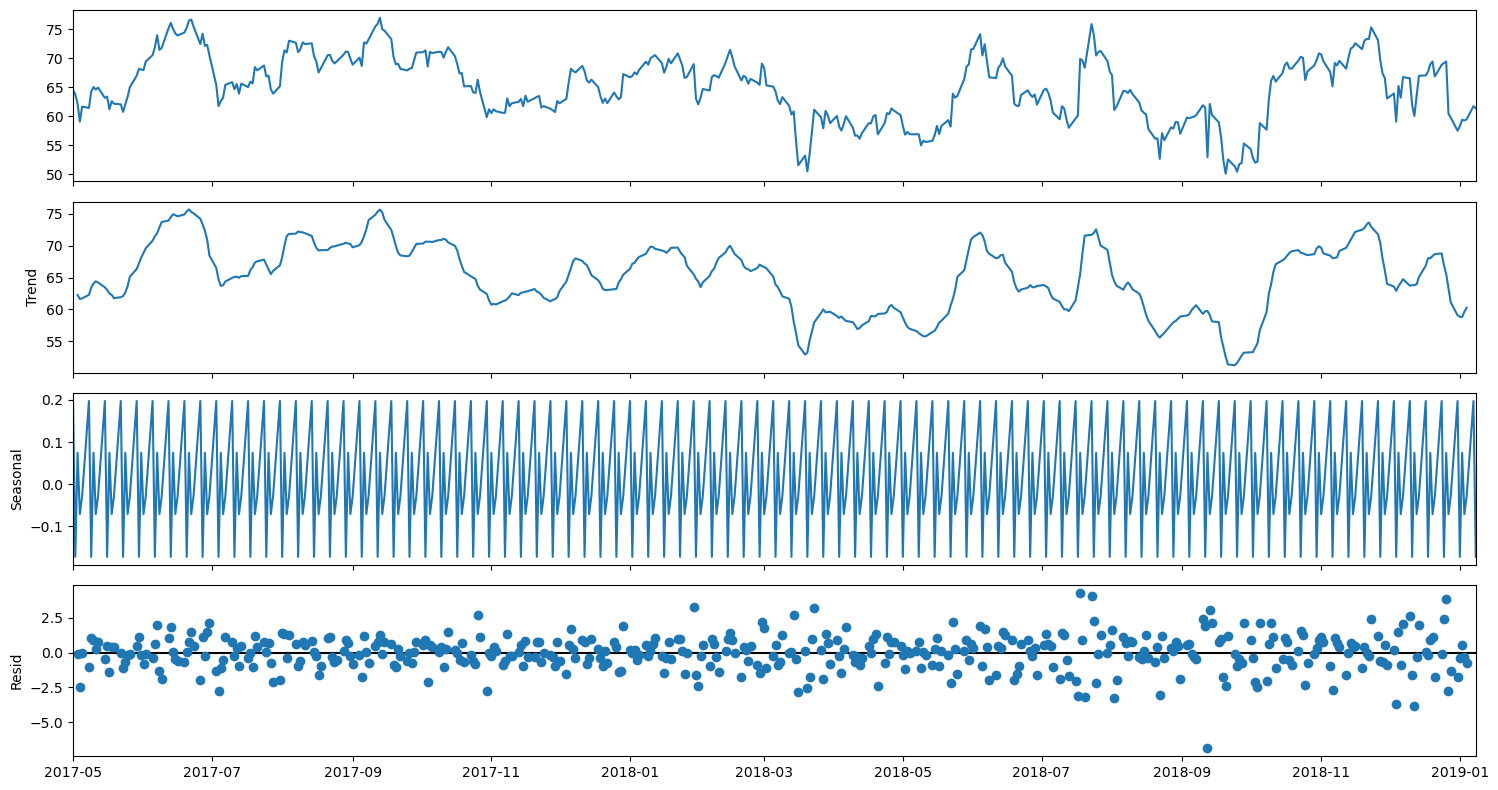

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df, model='additive')
decompose.plot()

In [63]:
from statsmodels.tsa.stattools import adfuller

adfuller(df) #p-value = 0.00254 < 0.5, so H0 is rejected...so data is stationery

(-3.8371932362652914,
 0.0025488986567835017,
 0,
 441,
 {'1%': -3.4452655826028318,
  '5%': -2.868116205869215,
  '10%': -2.570272878944473},
 1793.1284360926)

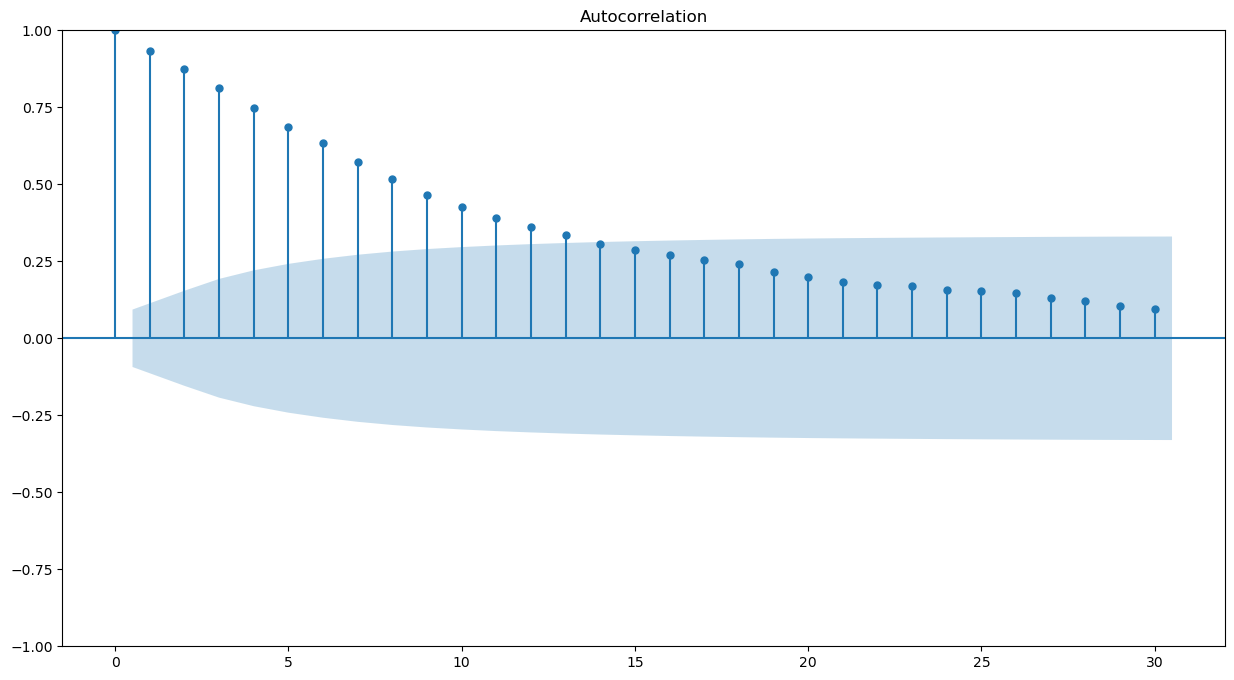

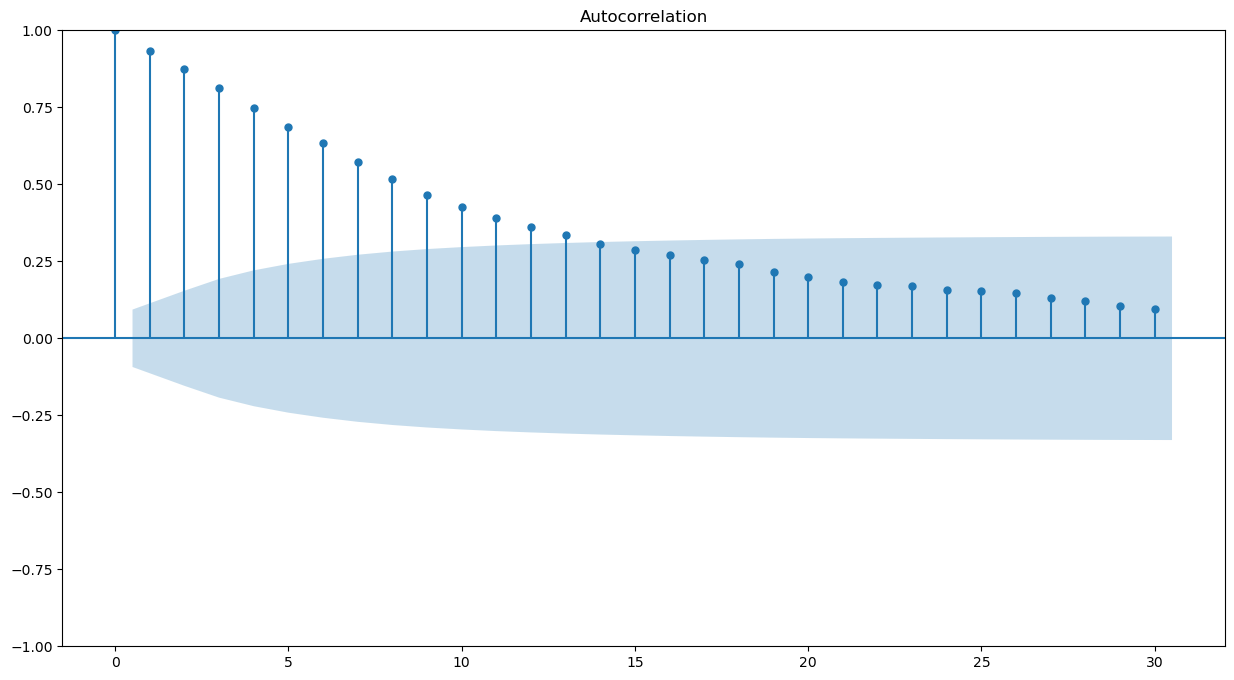

In [64]:
#ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=30)  #Q = 5

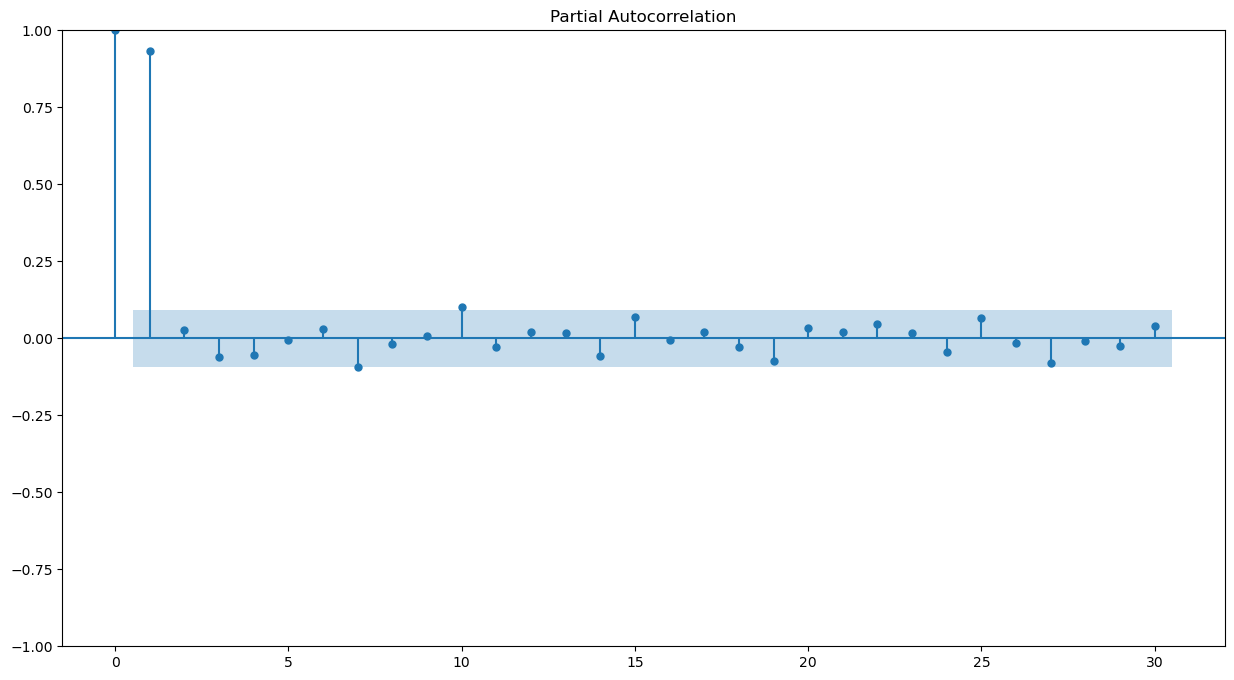

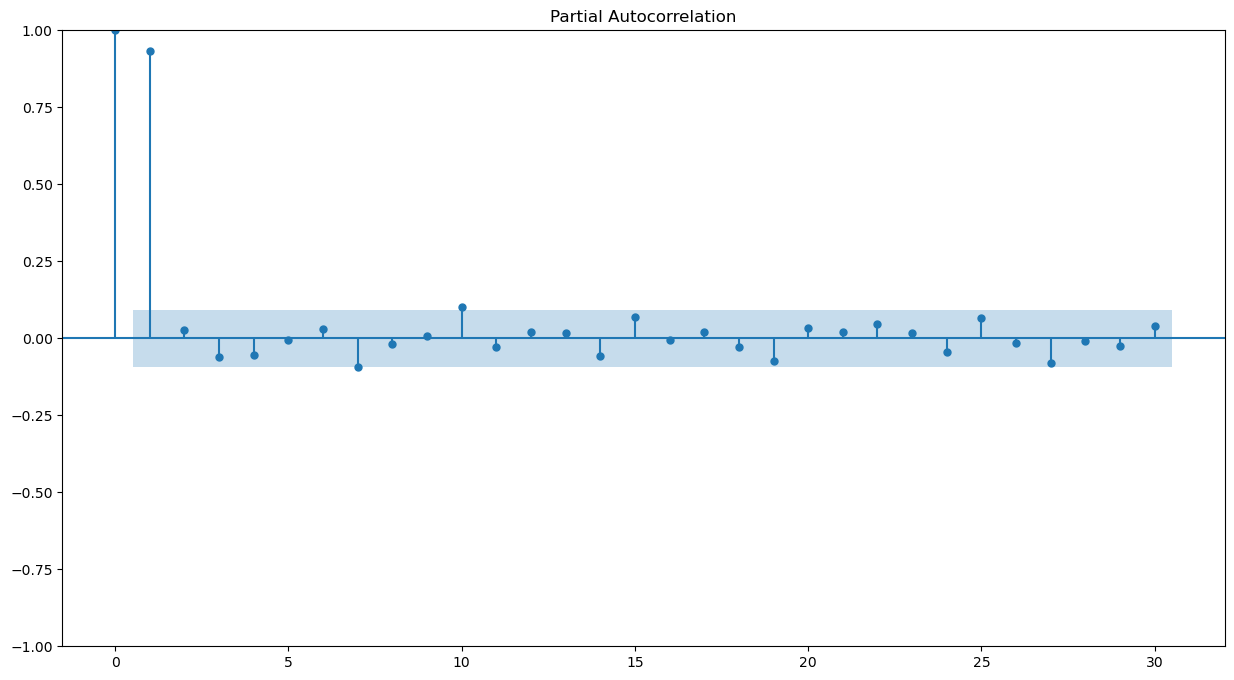

In [65]:
plot_pacf(df, lags=30)  #p=1

In [66]:
#splitting dataset into train and test
df.tail(50)

,Close
TimeStamp,
2018-10-31,70.86
2018-11-01,70.69
2018-11-02,69.50
2018-11-05,67.64
2018-11-06,65.17
2018-11-07,69.20
2018-11-08,68.78
2018-11-09,69.57
2018-11-12,68.23


In [67]:
from   datetime import  datetime, timedelta

train_end=datetime(2018,11,30)
test_end=datetime(2019,1,1)
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

**  3. Model Building (20 marks)
a. Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please 
comment on whether it is good or not. (5 marks)
c. How would you improve the model? What changes you will make in the base model. Fit the 
final model. (10 marks)
d. Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks)
e. Forecast the births for next 1 months using the final model? (3 marks)  **

**BASE MODEL USING ARMA**

In [89]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
p = q = range(0, 4)

d= 0
pdq = list(itertools.product(p,[d],q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))



parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [90]:
dfObj = pd.DataFrame(columns=['params', 'AIC'])
dfObj

,params,AIC


In [92]:
for param in pdq:
           
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
               # dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)


           

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\stat

ARIMA(0, 0, 0) - AIC:2618.4456402091355
ARIMA(0, 0, 1) - AIC:2236.0435186790387


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - AIC:2044.913742733419


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 3) - AIC:1932.6038174230805
ARIMA(1, 0, 0) - AIC:1724.8689584112658


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\stat

ARIMA(1, 0, 1) - AIC:1726.8125687683946


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) - AIC:1728.026269613066


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) - AIC:1726.8389969014775


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) - AIC:1726.80761695817


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

ARIMA(2, 0, 1) - AIC:1728.4993233370778


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - AIC:1727.9192312177624


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 3) - AIC:1728.7042302597768


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 0) - AIC:1728.1448881876022


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) - AIC:1728.0629979620137


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 2) - AIC:1725.6156222641707


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 3) - AIC:1726.0996680676376


In [86]:
#(p,d,q) = (1,0,0) has the least AIC...so picking that.

,params,AIC


In [94]:
mod = ARIMA(train, order=(1,0,0))
results_Arima = mod.fit()
print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  415
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -859.434
Date:                Mon, 10 Jun 2024   AIC                           1724.869
Time:                        19:10:20   BIC                           1736.954
Sample:                    05-01-2017   HQIC                          1729.648
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.0180      1.593     40.814      0.000      61.896      68.140
ar.L1          0.9387      0.015     60.669      0.000       0.908       0.969
sigma2         3.6651      0.157     23.320      0.0

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [95]:
ARMA_predict = results_Arima.forecast(len(test))


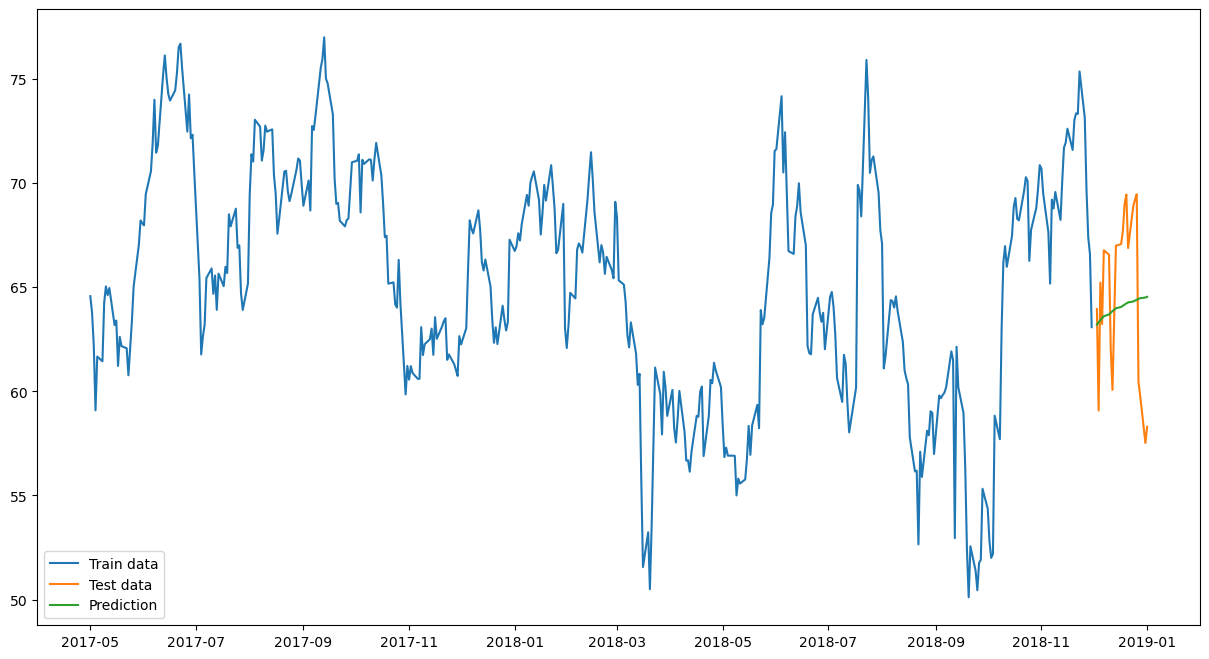

In [97]:
#plotting
plt.plot(train, label='Train data')
plt.plot(test, label='Test data')
plt.plot(test.index, ARMA_predict, label='Prediction')
plt.legend()
plt.show()

In [103]:
#RMSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

print('MAPE : {},'.format(mean_absolute_percentage_error(test, ARMA_predict)))
print('RMSE : {},' .format(np.sqrt(mean_squared_error(test, ARMA_predict))))

MAPE : 0.05512262901513538,
RMSE : 3.941485523383708,


**MODEL IMPROVEMENT**

In [105]:
#Use Exponential Smoothing Technique

from statsmodels.tsa.api                  import  ExponentialSmoothing

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Close,No. Observations:,415
Model:,ExponentialSmoothing,SSE,1551.209
Optimized:,True,AIC,565.182
Trend:,Additive,BIC,601.437
Seasonal:,Additive,AICC,565.837
Seasonal Periods:,5,Date:,"Mon, 10 Jun 2024"
Box-Cox:,False,Time:,19:20:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9652569,alpha,True
smoothing_trend,1.4238e-09,beta,True


In [106]:
TES_predictions =  model_TES.forecast(len(test))

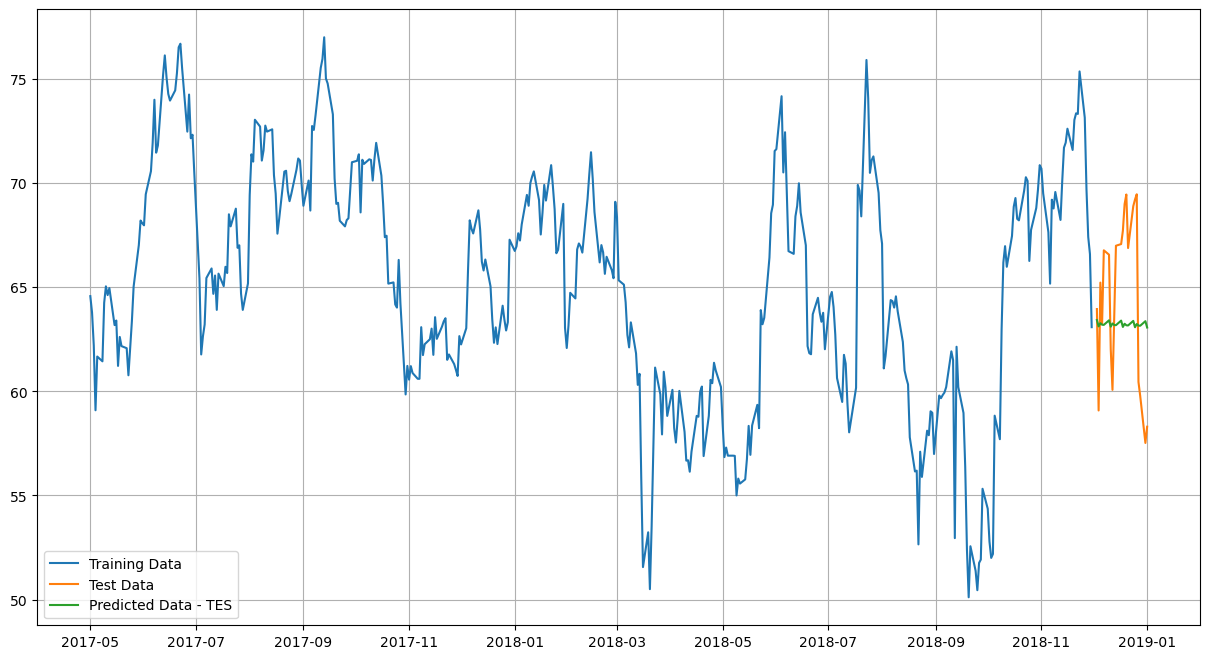

In [107]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [108]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(smoothing_level=0.9542595,smoothing_trend=0.00607340,smoothing_seasonal=0.00158913,optimized=False)
model_TES.summary()

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Close,No. Observations:,415
Model:,ExponentialSmoothing,SSE,1684.573
Optimized:,False,AIC,599.410
Trend:,Additive,BIC,635.665
Seasonal:,Additive,AICC,600.065
Seasonal Periods:,5,Date:,"Mon, 10 Jun 2024"
Box-Cox:,False,Time:,19:21:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,False
smoothing_trend,0.0060734,beta,False


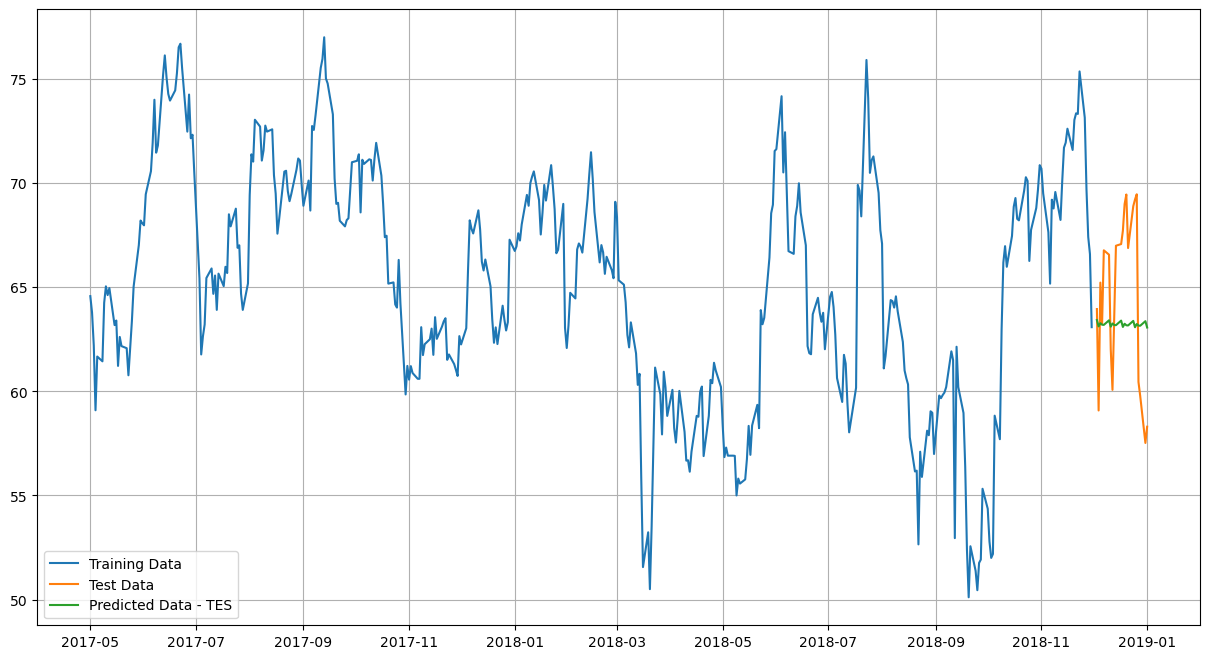

In [109]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [113]:
#Residual plotting

residuals = test['Close'].values - TES_predictions.values
residuals

array([ 0.52783914, -4.03805088,  1.94833634,  0.03236288,  3.58091257,
        3.15140979, -1.08448022, -3.188093  ,  0.35593354,  3.81448323,
        3.67498045,  4.61909044,  5.74547766,  6.2795042 ,  3.71805389,
        5.50855111,  6.1326611 ,  6.22904832, -2.70692514, -3.36837545,
       -5.84787823, -4.76376824])

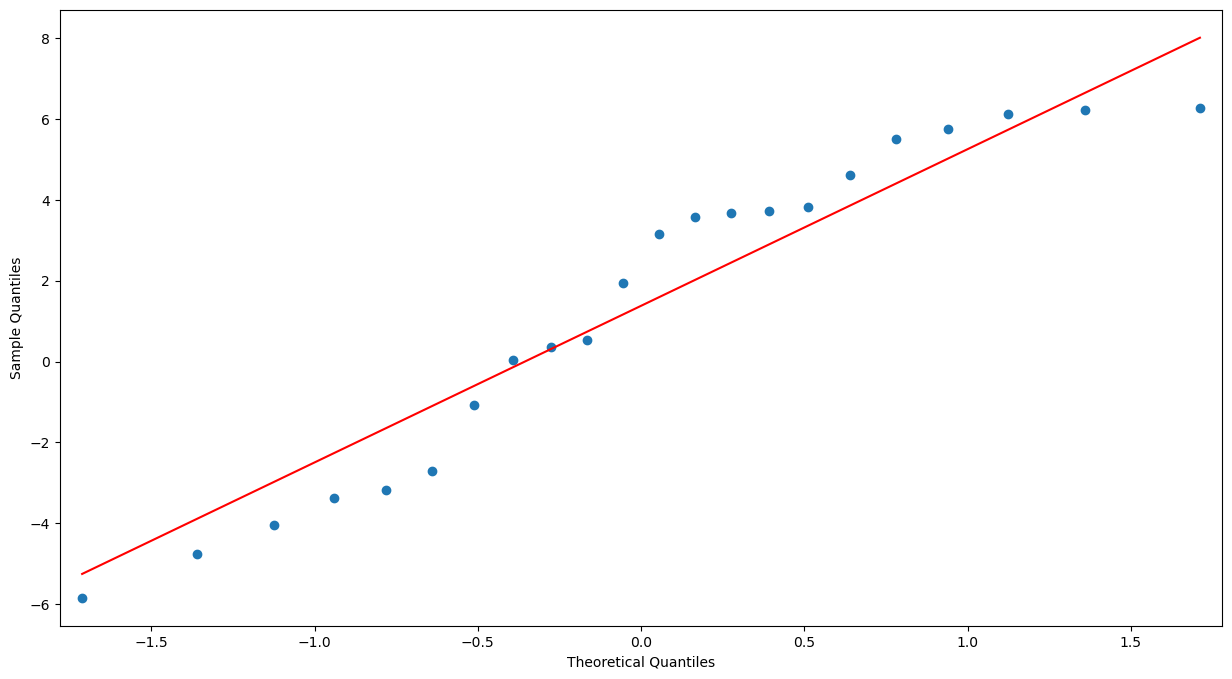

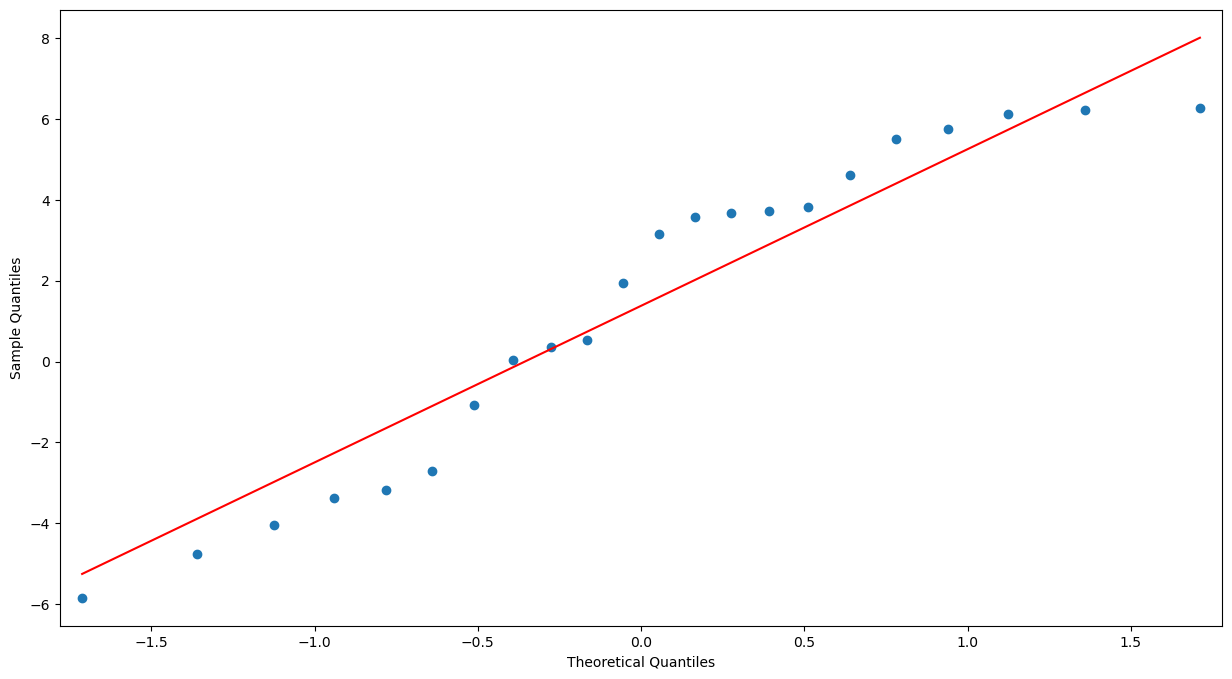

In [114]:
from statsmodels.graphics.gofplots        import  qqplot
qqplot(residuals, line='s')